#### Secciones
* Series (Breve introduccion para que entiendan mejor los dataframes
* DataFrames
 * crear o cargar un df 
 * primera exploracion de la estructura del df
 * subseting de columnas y filas
* Primeros graficos exploratorios
* Transformaciones
* grouping y reshaping


## Borrador

### Series

Ya vivmos que podemos trabajar con grupos de elementos utilizando listas, diccionarios y tuplas.
En algunos casos trabajar con estos objetos puede ser lento o engorroso. 
por ejemplo tenemos una lista de números y queremos saber si son pares:

In [126]:
n =  500
numeros = [2,4,5,67,21,4323,356,231,1235,75,56,1,125,8456,121,3,423,3456,31,1235,75,5656747,
           4,32,42,423,423,423,4,23354,47,5,867,83,22,423,423,4,23354,4724,312341,14, 7,23,6,34,212,67,
           7,12313,53,6,676,7567,456,241235,365,756856] * n
repeticiones = {}
for numero in numeros:
    if numero % 2 == 0:
        pares.append(numero)
    repeticiones[numero] = numeros.count(numero)
pares
for numero, rep in repeticiones.items():
    if rep > n:
        print(numero, rep)

4 2000
5 1000
67 1000
1235 1000
75 1000
423 3000
23354 1000
7 1000
6 1000


In [136]:
fibo = [0, 1, 1, 2, 3, 5, 8, 13, 21, 34]

In [142]:
fibo2 = []
for n in fibo:
    print(n)
    fibo2.append(n ** 2)

0
1
1
2
3
5
8
13
21
34


### Pandas Series

In [147]:
import pandas as pd

In [150]:
fibo_serie = pd.Series(fibo)
print(fibo_serie)

0     0
1     1
2     1
3     2
4     3
5     5
6     8
7    13
8    21
9    34
dtype: int64


In [175]:
fibo_serie

0     0
1     1
2     1
3     2
4     3
5     5
6     8
7    13
8    21
9    34
dtype: int64

In [178]:
fibo_serie == 5 # nos devuelve otra serie con valores True o False dependiendo los elementos de la serie que cumplen la condicion

0    False
1    False
2    False
3    False
4    False
5     True
6    False
7    False
8    False
9    False
dtype: bool

In [194]:
serie * 100000

0                200000
1                400000
2                500000
3               6700000
4               2100000
               ...     
28999995      756700000
28999996       45600000
28999997    24123500000
28999998       36500000
28999999    75685600000
Length: 29000000, dtype: int64

### DataFrames

In [1]:
import pandas as pd

In [5]:
dataframe = pd.read_csv('../data/swiss_prot.tab', sep='\t')

In [7]:
df = dataframe

In [9]:
df.shape

(20396, 9)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20396 entries, 0 to 20395
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Entry           20396 non-null  object
 1   Entry name      20396 non-null  object
 2   Status          20396 non-null  object
 3   Protein names   20396 non-null  object
 4   Gene names      20255 non-null  object
 5   Organism        20396 non-null  object
 6   Length          20396 non-null  int64 
 7   Features        20396 non-null  object
 8   Interacts with  12064 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.4+ MB


In [14]:
data = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')

In [35]:
df = data.loc[data.date == "2021-02-18"]

In [36]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
360,AFG,Asia,Afghanistan,2021-02-18,55557.0,17.0,19.571,2430.0,2.0,1.571,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.50,64.83,0.511
734,OWID_AFR,NaN,Africa,2021-02-18,3799304.0,13893.0,11613.000,100325.0,511.0,437.143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1096,ALB,Europe,Albania,2021-02-18,96838.0,1112.0,1008.857,1617.0,17.0,14.286,...,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795
1458,DZA,Africa,Algeria,2021-02-18,111418.0,171.0,195.571,2950.0,3.0,2.857,...,13913.839,0.5,278.364,6.73,0.7,30.4,83.741,1.90,76.88,0.748
1814,AND,Europe,Andorra,2021-02-18,10610.0,27.0,31.286,107.0,0.0,0.143,...,NaN,NaN,109.135,7.97,29.0,37.8,NaN,NaN,83.73,0.868


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204 entries, 360 to 70220
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               204 non-null    object 
 1   continent                              195 non-null    object 
 2   location                               204 non-null    object 
 3   date                                   204 non-null    object 
 4   total_cases                            199 non-null    float64
 5   new_cases                              199 non-null    float64
 6   new_cases_smoothed                     199 non-null    float64
 7   total_deaths                           188 non-null    float64
 8   new_deaths                             188 non-null    float64
 9   new_deaths_smoothed                    199 non-null    float64
 10  total_cases_per_million                198 non-null    float64
 11  ne

In [62]:
columnas_importantes = ['iso_code', 'continent', 'location', 'total_cases','new_cases', 'total_deaths', 'new_deaths', 'life_expectancy', 'hospital_beds_per_thousand','human_development_index', 'gdp_per_capita']

In [75]:
# Quedarnos con un subset de columnas de la tabla
subset1 = df.loc[: , columnas_importantes]  # version 1
subset2 = df[columnas_importantes]          # version 2

In [80]:
df = subset2.copy()

In [82]:
df.head()

,iso_code,continent,location,total_cases,new_cases,total_deaths,new_deaths,life_expectancy,hospital_beds_per_thousand,human_development_index,gdp_per_capita
360,AFG,Asia,Afghanistan,55557.0,17.0,2430.0,2.0,64.83,0.50,0.511,1803.987
734,OWID_AFR,NaN,Africa,3799304.0,13893.0,100325.0,511.0,NaN,NaN,NaN,NaN
1096,ALB,Europe,Albania,96838.0,1112.0,1617.0,17.0,78.57,2.89,0.795,11803.431
1458,DZA,Africa,Algeria,111418.0,171.0,2950.0,3.0,76.88,1.90,0.748,13913.839
1814,AND,Europe,Andorra,10610.0,27.0,107.0,0.0,83.73,NaN,0.868,NaN


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204 entries, 360 to 70220
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   iso_code                    204 non-null    object 
 1   continent                   195 non-null    object 
 2   location                    204 non-null    object 
 3   total_cases                 199 non-null    float64
 4   new_cases                   199 non-null    float64
 5   total_deaths                188 non-null    float64
 6   new_deaths                  188 non-null    float64
 7   life_expectancy             194 non-null    float64
 8   hospital_beds_per_thousand  167 non-null    float64
 9   human_development_index     185 non-null    float64
 10  gdp_per_capita              185 non-null    float64
dtypes: float64(8), object(3)
memory usage: 19.1+ KB


In [95]:
df['new_cases']

360          17.0
734       13893.0
1096       1112.0
1458        171.0
1814         27.0
           ...   
68829        18.0
69225    403198.0
69542         3.0
69882       790.0
70220       120.0
Name: new_cases, Length: 204, dtype: float64

In [101]:
df.loc[df.continent == "South America", 'new_cases']

2924      7671.0
8344      1029.0
9386     51879.0
13335     3828.0
14083     4824.0
18962     1641.0
27346       25.0
49760     1369.0
50112     7408.0
60747        6.0
67292      544.0
68434      462.0
Name: new_cases, dtype: float64

In [104]:
df.set_index('location', inplace=True)

In [105]:
df

,iso_code,continent,total_cases,new_cases,total_deaths,new_deaths,life_expectancy,hospital_beds_per_thousand,human_development_index,gdp_per_capita
location,,,,,,,,,,
Afghanistan,AFG,Asia,55557.0,17.0,2430.0,2.0,64.83,0.500,0.511,1803.987
Africa,OWID_AFR,NaN,3799304.0,13893.0,100325.0,511.0,NaN,NaN,NaN,NaN
Albania,ALB,Europe,96838.0,1112.0,1617.0,17.0,78.57,2.890,0.795,11803.431
Algeria,DZA,Africa,111418.0,171.0,2950.0,3.0,76.88,1.900,0.748,13913.839
Andorra,AND,Europe,10610.0,27.0,107.0,0.0,83.73,NaN,0.868,NaN
...,...,...,...,...,...,...,...,...,...,...
Vietnam,VNM,Asia,2347.0,18.0,35.0,0.0,75.40,2.600,0.704,6171.884
World,OWID_WRL,NaN,110306030.0,403198.0,2441598.0,11409.0,72.58,2.705,0.737,15469.207
Yemen,YEM,Asia,2154.0,3.0,618.0,0.0,66.12,0.700,0.470,1479.147


In [107]:
nuevos_casos = df.loc[df.continent == "South America", 'new_cases']

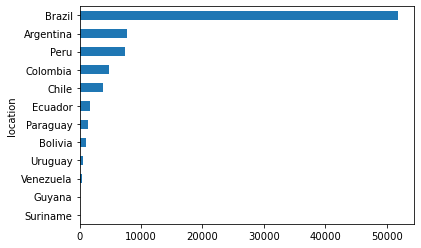

In [112]:
nuevos_casos.sort_values().plot.barh()